In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random as rd
import sys
import scipy.stats as stats
import seaborn as sb



In [3]:
#importlib.reload(PeakDetective)

In [4]:
datadirs = ["D:/PeakDetective/data/covid_plasma/","D:/PeakDetective/data/ST000081/","D:/PeakDetective/data/ST001882_GT_RP_Positive/"]

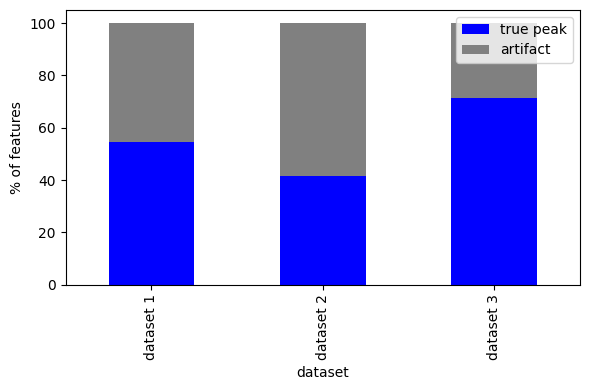

In [17]:
df = {}
counter = 1
for datadir in datadirs:
    files = [x for x in os.listdir(datadir) if ".mzML" in x]
    peakList_labeled = pd.read_csv(datadir + files[0].replace(".mzML","_classified_peaks.csv"),index_col=0)
    for index,row in peakList_labeled.iterrows():
        if row["classification"] > 0.5:
            df[len(df)] = {"dataset":"dataset " + str(counter) ,"classification":"true peak"}
        else:
            df[len(df)] = {"dataset":"dataset " + str(counter) ,"classification":"artifact"}
    counter += 1
    
df = pd.DataFrame.from_dict(df,orient="index")

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf


res = aggregate('dataset','classification',df)
res.plot(kind='bar',stacked=True,color=["blue","grey"])
#plt.xticks([],[])
plt.ylabel("% of features")
plt.tight_layout()
plt.savefig("../manuscript/figures/frac_artifacts.png",dpi=300)

In [18]:
res

,true peak,artifact
dataset,,
dataset 1,54.4,45.6
dataset 2,41.4,58.6
dataset 3,71.4,28.6


In [19]:
np.mean(res["artifact"])

44.26666666666667